In [1]:
from pymouse import PyMouse
from pykeyboard import PyKeyboard

In [30]:
import numpy as np
import matplotlib.pylab as plt

In [13]:
import time

In [2]:
m = PyMouse()
k = PyKeyboard()

In [20]:
def countdown(seconds):
    if seconds >= 1:
        print(seconds, end='')
        time.sleep(0.4)
        print('.', end='')
        time.sleep(0.3)
        print('.')
        time.sleep(0.3)
        return countdown(seconds-1)

In [51]:
def euclidean_distance(tuple1, tuple2):
    dist = 0
    for (x1,x2) in zip(tuple1,tuple2):
        dist += (x2-x1)**2
    return np.sqrt(dist)

In [92]:
def record_mouse_on_movement(how_many_seconds = 3): 
    mouse_positions = [(0,0)]
    t = []
    end = time.time() + how_many_seconds
    current_time = 0
    while current_time < end:
        current_time = time.time()
        current_mouse_position = m.position()
        if current_mouse_position != mouse_positions[-1]:
            t.append(current_time)
            mouse_positions.append(current_mouse_position)
    return t, np.array(mouse_positions[1:])

In [170]:
mouse_positions = [(0,0)]
t = []
#end = time.time() + how_many_seconds
#current_time = 0
while True:#current_time < end:
    current_time = time.time()
    current_mouse_position = m.position()
    if current_mouse_position != mouse_positions[-1]:
        t.append(current_time)
        mouse_positions.append(current_mouse_position)

KeyboardInterrupt: 

In [109]:
def recreate_mouse_movement(timestamps, mouse_positions):
    assert len(timestamps) == mouse_positions.shape[0]
    time_differences = np.diff(timestamps)
    for t,mouse_position in zip(time_differences,mouse_positions):
        #print(t,mouse_position)
        time.sleep(t)
        m.move(*mouse_position)

In [115]:
t, mouse_positions = record_mouse_on_movement(3)

In [172]:
recreate_mouse_movement(t,mouse_positions)

AttributeError: 'list' object has no attribute 'shape'

In [152]:
def flip_upside_down(mouse_positions):
    xmax, ymax = m.screen_size()
    return mouse_positions*np.array([1,-1]) + np.array([0,ymax])

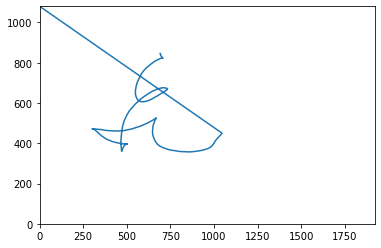

In [173]:
plt.xlim(0,xmax)
plt.ylim(0,ymax)
#plt.plot(*(mouse_positions).T)
plt.plot(*flip_upside_down(mouse_positions).T)

In [167]:
def switch_tab():
    k.press_key(k.control_key)
    k.tap_key(k.tab_key)
    k.release_key(k.control_key)